# Generation

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from scipy.signal import periodogram
import os
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima.arima import auto_arima #Descargar
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings

## Data pre-processing and Exploratory Data Analyst (EDA)

In [ ]:
# Import the dataset
fossil = pd.read_csv("generation_fossil.csv", sep=";")
gas = pd.read_csv("generation_gas.csv", sep=";")
hydro = pd.read_csv("generation_hydro.csv", sep=";")
nuclear = pd.read_csv("generation_nuclear.csv", sep=";")
solar = pd.read_csv("generation_solar.csv", sep=";")
wind = pd.read_csv("generation_wind.csv", sep=";")

In [ ]:
# Keep just the information of the first three years
fossil = fossil.iloc[0:26274,[4,5]]

# Rename the column value
fossil = fossil.rename(columns={'value': 'fossil_prod'})

# Convert datetime to data type of variable
fossil['datetime'] = pd.to_datetime(fossil['datetime'], utc=True)

# Set the datetime as the index
fossil.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = fossil.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2021-06-08 11:00:00+00:00', '2021-06-08 12:00:00+00:00',
               '2021-06-08 13:00:00+00:00', '2021-06-08 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
gas = gas.iloc[0:26278,[4,5]]

# Rename the column value
gas = gas.rename(columns={'value': 'gas_prod'})

# Convert datetime to data type of variable
gas['datetime'] = pd.to_datetime(gas['datetime'], utc=True)

# Set the datetime as the index
gas.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = gas.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
hydro = hydro.iloc[0:26302,[4,5]]

# Rename the column value
hydro = hydro.rename(columns={'value': 'hydro_prod'})

# Convert datetime to data type of variable
hydro['datetime'] = pd.to_datetime(hydro['datetime'], utc=True)

# Set the datetime as the index
hydro.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = hydro.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
nuclear = nuclear.iloc[0:26278,[4,5]]

# Rename the column value
nuclear = nuclear.rename(columns={'value': 'nuclear_prod'})

# Convert datetime to data type of variable
nuclear['datetime'] = pd.to_datetime(nuclear['datetime'], utc=True)

# Set the datetime as the index
nuclear.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = nuclear.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
solar = solar.iloc[0:26278,[4,5]]

# Rename the column value
solar = solar.rename(columns={'value': 'solar_prod'})

# Convert datetime to data type of variable
solar['datetime'] = pd.to_datetime(solar['datetime'], utc=True)

# Set the datetime as the index
solar.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = solar.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Keep just the information of the first three years
wind = wind.iloc[0:26278,[4,5]]

# Rename the column value
wind = wind.rename(columns={'value': 'wind_prod'})

# Convert datetime to data type of variable
wind['datetime'] = pd.to_datetime(wind['datetime'], utc=True)

# Set the datetime as the index
wind.set_index("datetime", inplace=True)

# The years collected have 365 so we expect to have 24*365*3 = 26280. However, we get a different number
# Missing observations are:

# Get the index of the DataFrame
index = wind.index

# Check for any missing hours in the index
missing_hours = pd.date_range(start=index.min(), end=index.max(), freq='H').difference(index)

# Print the missing hours
print("Missing hours:", missing_hours)

Missing hours: DatetimeIndex(['2022-10-30 01:00:00+00:00', '2023-10-29 01:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [ ]:
# Join DataFrames on datetime index
combined = fossil.join([gas, hydro, nuclear, solar, wind], how='outer')

In [ ]:
# Check for missing values per column
missing = combined.isna().sum()
columns_with_missing_values = missing[missing>0]
print("Number of columns with missing values:", columns_with_missing_values)
# It does not exist missing data

Number of columns with missing values: fossil_prod     15769
gas_prod        15801
hydro_prod      11806
nuclear_prod    12210
solar_prod      12076
wind_prod          25
dtype: int64


In [ ]:
# Remove rows with missing values
combined = combined.dropna()

# Two full years and one year with a missing day (364) leads to 26256 observations.
# Removing the missing observations, 6 observations (fossil is missing in all, the rest in only 2) returns 26250.
# Change the order of the columns, to enhace the readability of further plots
desired_order = ['solar_prod', 'wind_prod', 'nuclear_prod', 'hydro_prod', 'fossil_prod', 'gas_prod']
combined = combined[desired_order]

In [ ]:
# Get an initial intuition of the data, summarizing and extracting main metrics
combined.describe()

,solar_prod,wind_prod,nuclear_prod,hydro_prod,fossil_prod,gas_prod
count,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000
mean,2332.375659,6790.391805,6310.987807,3027.664190,888.565403,20369.121718
std,3034.991720,3848.462603,901.885469,2389.038378,161.718984,1450.049343
min,-47.000000,182.166667,3705.500000,-2992.166667,200.000000,16122.700000
25%,9.333333,3721.625000,5940.875000,1425.708333,908.000000,19651.500000
50%,103.250000,6113.666667,6898.333333,2740.833333,908.000000,20735.800000
75%,4920.458333,9370.208333,7078.791667,4357.166667,908.000000,21327.200000
max,9999.666667,19856.833333,7125.166667,11656.333333,1249.700000,23334.500000


In [ ]:
# We have seen above that there exist negative values for both hydro and solar production.
# This does not makes sense, as we have non-negative contraint for these variables.
# Cosnequenlty, change negative values for zeros.
combined.loc[combined['hydro_prod'] < 0, 'hydro_prod'] = 0
combined.loc[combined['solar_prod'] < 0, 'solar_prod'] = 0

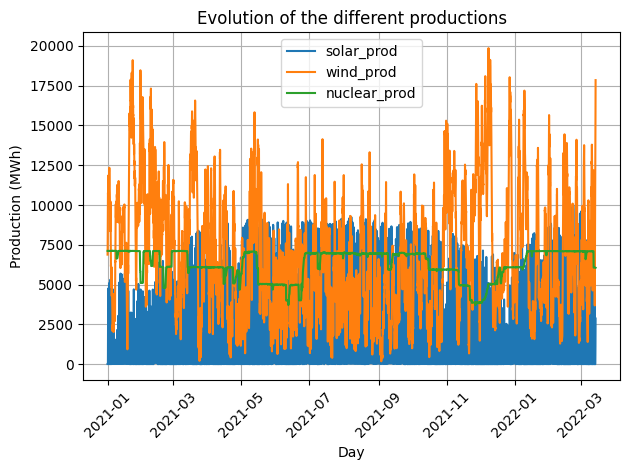

In [ ]:
# Display a plot where for the evolution of electricity generated
for column in combined.columns[:3]:
    if column != 'datetime':  # Exclude datetime column
        plt.plot(combined.index, combined[column], label=column)

plt.xlabel("Day")
plt.ylabel("Production (MWh)")
plt.title("Evolution of the different productions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

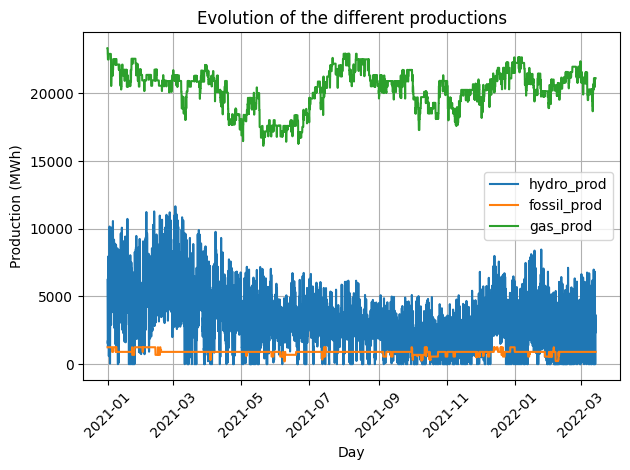

In [ ]:
# Display a plot where for the evolution of electricity generated
for column in combined.columns[3:6]:
    if column != 'datetime':  # Exclude datetime column
        plt.plot(combined.index, combined[column], label=column)

plt.xlabel("Day")
plt.ylabel("Production (MWh)")
plt.title("Evolution of the different productions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Two different ways of extracting the maximum limitation will be applied depending on the type of input used for producing the electricity:

- Renewables: Generate observation based on a distribution. Here wind, solar and hydro energy are included.

- Non-renewables: Obtain the maximum electricity produced in the series and scale to the size of our enterprise. Here fossil, gas and nuclear energy are included.

## Non-renewables:

In [ ]:
# Fossil:
max_fossil = combined["fossil_prod"].max()
own_max_fossil = max_fossil * 0.121
own_max_fossil

151.2137

In [ ]:
# Gas:
max_gas = combined["gas_prod"].max()
own_max_gas = max_gas * 0.121
own_max_gas

2823.4745

In [ ]:
# Nuclear:
max_nuclear = combined["nuclear_prod"].max()
own_max_nuclear = max_nuclear * 0.121
own_max_nuclear

862.145166666667

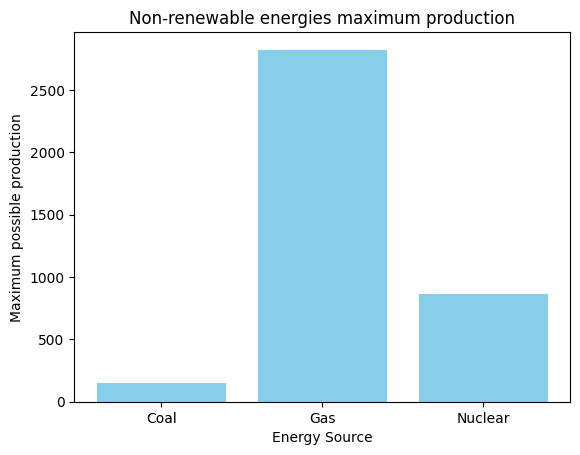

In [ ]:
observations = [own_max_fossil, own_max_gas, own_max_nuclear]
names = ['Coal', 'Gas', 'Nuclear']

plt.bar(names, observations, color='skyblue')
plt.xlabel('Energy Source')
plt.ylabel('Maximum possible production')
plt.title('Non-renewable energies maximum production')

# Show plot
plt.show()

## Renewables:

Serval papers analyse this values using a normal distribution, such as Sales-Mix (2023). However, the fact that we are facing a series, where the date is important implies that this is not a good idea. The date is correlated with the weather conditions, which significantly affect the renewable production levels.

In this paper, we opt for modeling with ARIMA.

### Solar:

#### Split the dataset

The split of the data into train and test would be done after the pre-processing. Something that could not have done if the database would have required pre-processing actions such as imputation, scaling or feature selection, that may lead to **data-leakage**. Data-leakage occurs when the researcher carry out pre-processing actions defined above prior to spliting the data, implying that the test data affect indirectly the model composition. The latter implies that the model evaluation would be too optimistic.

However, this would not occur in our model as none of the aforementioned pre-processing task must be accomplish.

Our data is non independent, it has a temporal order, so we have to be careful when splitting the dataset. This split will not be random, first observation, older ones will be in the training set and newer ones will be in the test part. To create a representative partition of the problem, we have decided that the training part will be 80% of the dataset, and the test part will be the remaining 20%. As we have 26250 observations, 21000 will go for train and the rest, 5250 observations for test.

In [ ]:
# Ensure that the dataset is ordered by datetime
combined = combined.sort_index()

In [ ]:
# How many observations goes to test?
split_index = 5250
solar = combined.iloc[:,0]

# Split train and test
data_train_solar = solar[0:-split_index]
data_test_solar = solar[-split_index:]

#### Estimate ARIMA using ACF and PACF:

In [ ]:
# Perform the Aumented Dicky-Fuller test to confirm the stationarity
dicky_fuller_result_1 = adfuller(data_train_solar)
print('p-value: %f' % dicky_fuller_result_1[1])

p-value: 0.010072


In [ ]:
# Perform the KPSS test to confirm the stationary
kpss_result_1 = kpss(data_train_solar)
print('p-value: %f' % kpss_result_1[1])

p-value: 0.010000


<ipython-input-23-4bd08d35268f>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_1 = kpss(data_train_solar)


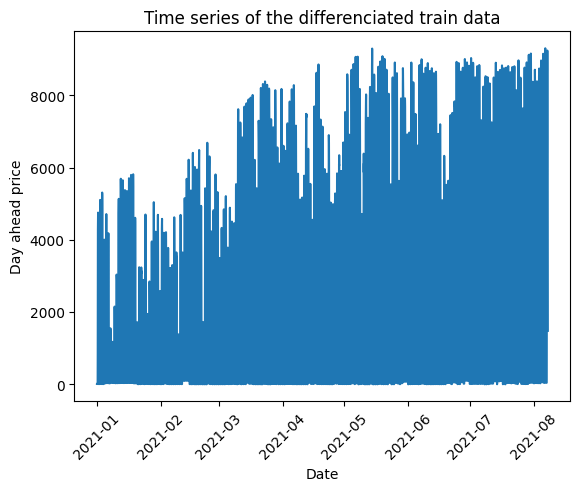

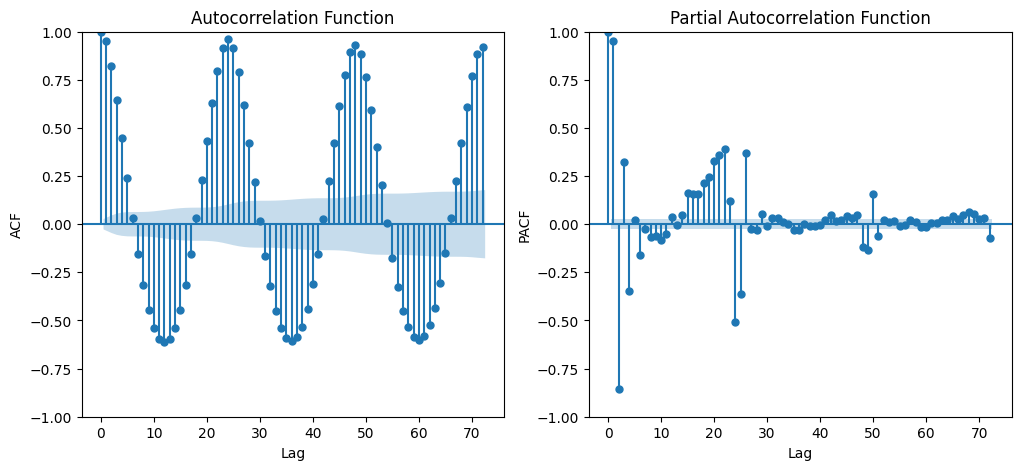

In [ ]:
# Plot the data
plt.plot(data_train_solar)
plt.xlabel("Date")
plt.ylabel("Day ahead price")
plt.title("Time series of the differenciated train data")
plt.xticks(rotation=45)
plt.show()

# Create a figure and axes for both plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Set ylim before plotting
#ylim = (-0.1, 0.1)

# Plot the ACF
plot_acf(data_train_solar, lags=72, ax=axs[0])
axs[0].set_title('Autocorrelation Function')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
#axs[0].set_ylim(ylim)

# Plot the PACF
plot_pacf(data_train_solar, lags=72, method='ywm', ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('PACF')
#axs[1].set_ylim(ylim)

# Show the plots
plt.show()

The ACF decays very slow so is probably non-stationary. Compute the difference with last hour observation, to eliminate the trend.

In [ ]:
# If we assume is not stationary, compute the difference (d=1):
diff_train_solar1 = data_train_solar.diff().dropna()

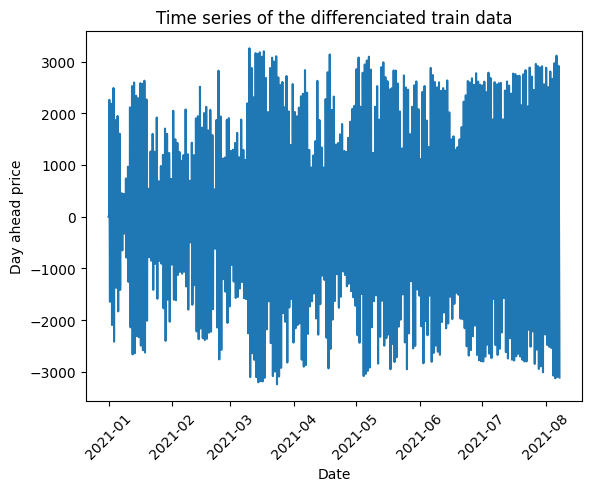

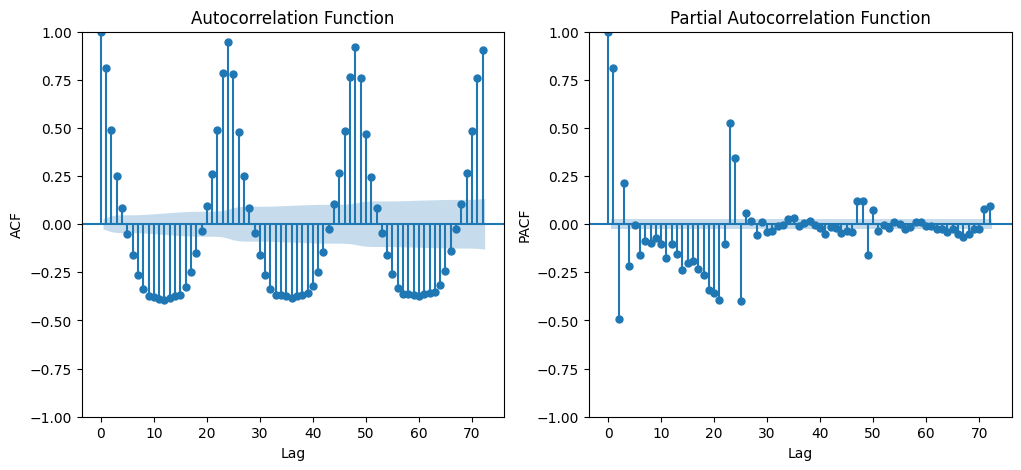

In [ ]:
# Plot the data
plt.plot(diff_train_solar1)
plt.xlabel("Date")
plt.ylabel("Day ahead price")
plt.title("Time series of the differenciated train data")
plt.xticks(rotation=45)
plt.show()

# Create a figure and axes for both plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Set ylim before plotting
#ylim = (-0.1, 0.1)

# Plot the ACF
plot_acf(diff_train_solar1, lags=72, ax=axs[0])
axs[0].set_title('Autocorrelation Function')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
#axs[0].set_ylim(ylim)

# Plot the PACF
plot_pacf(diff_train_solar1, lags=72, method='ywm', ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('PACF')
#axs[1].set_ylim(ylim)

# Show the plots
plt.show()

The alternating pattern of positive and negative autocorrelation suggests a repeating cycle in the data, corresponding to seasonal changes in temperature over the course of the year (D>=1), plus the idea that the seasonal lags are not decaying. Therefore, seasonal adjustment should be done, the adjustment will calculate the difference between each observation and the observation from the same month in the previous year, effectively removing the daily seasonality from the data.

In [ ]:
# Seasonal adjustment (D=1):

# Remove daily seasonality, obtaining the value of each observation - last day observation
diff_train_solar2 = diff_train_solar1.diff(periods=24)

# However, there will be some observations (first ones) for which there is not previous day observations
diff_train_solar2 = diff_train_solar2.dropna()

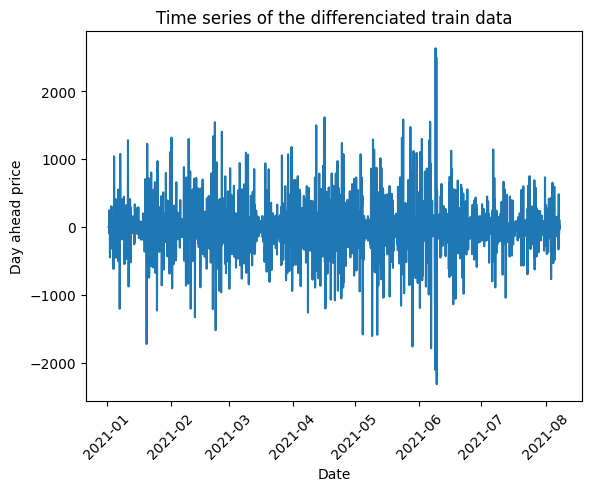

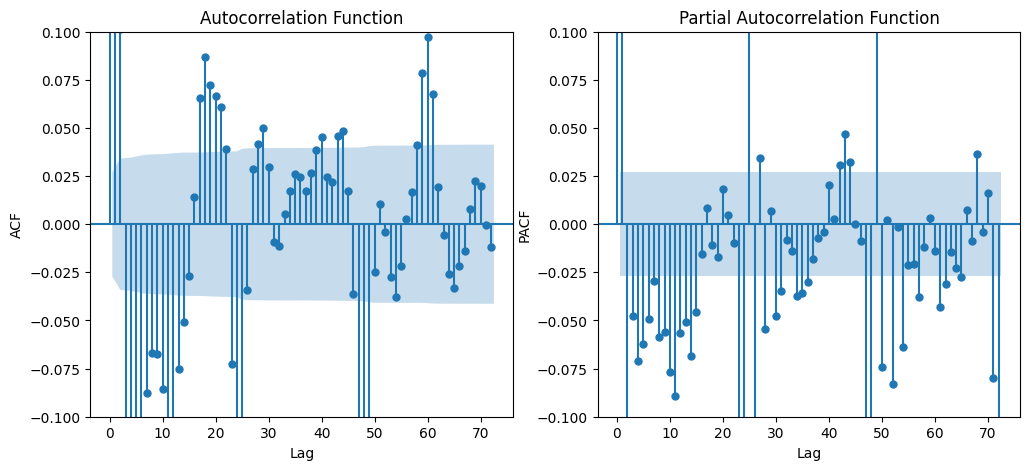

In [ ]:
# Plot the data
plt.plot(diff_train_solar2)
plt.xlabel("Date")
plt.ylabel("Day ahead price")
plt.title("Time series of the differenciated train data")
plt.xticks(rotation=45)
plt.show()

# Create a figure and axes for both plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Set ylim before plotting
ylim = (-0.1, 0.1)

# Plot the ACF
plot_acf(diff_train_solar2, lags=72, ax=axs[0])
axs[0].set_title('Autocorrelation Function')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
axs[0].set_ylim(ylim)

# Plot the PACF
plot_pacf(diff_train_solar2, lags=72, method='ywm', ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('PACF')
axs[1].set_ylim(ylim)

# Show the plots
plt.show()

**SIGUIENTE PRUEBA 2.2**


In [31]:
# Seasonal adjustment (D=1):

# Remove daily seasonality, obtaining the value of each observation - last day observation
diff_train_solar3 = data_train_solar.diff(periods=24)

# However, there will be some observations (first ones) for which there is not previous day observations
diff_train_solar3 = diff_train_solar3.dropna()

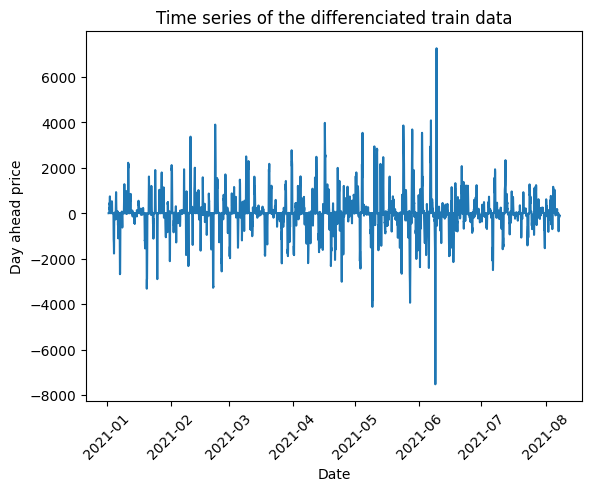

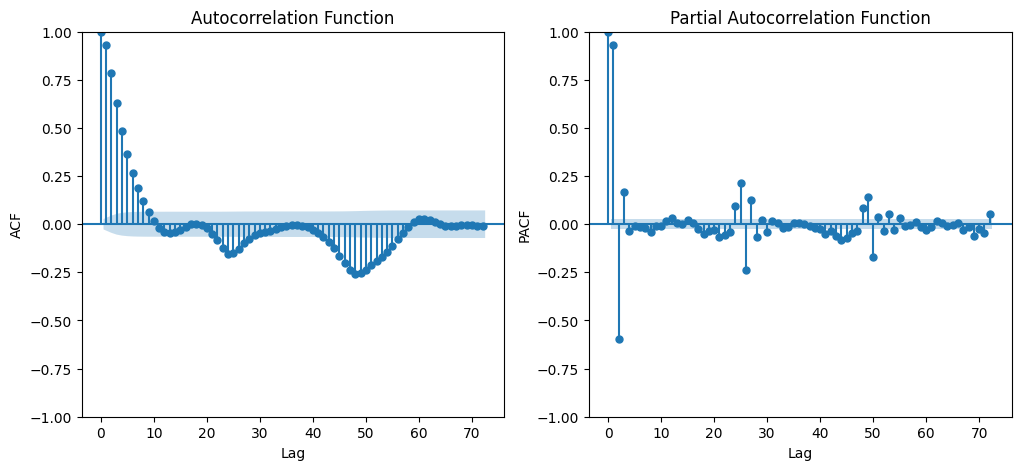

In [32]:
# Plot the data
plt.plot(diff_train_solar3)
plt.xlabel("Date")
plt.ylabel("Day ahead price")
plt.title("Time series of the differenciated train data")
plt.xticks(rotation=45)
plt.show()

# Create a figure and axes for both plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Set ylim before plotting
#ylim = (-0.1, 0.1)

# Plot the ACF
plot_acf(diff_train_solar3, lags=72, ax=axs[0])
axs[0].set_title('Autocorrelation Function')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
#axs[0].set_ylim(ylim)

# Plot the PACF
plot_pacf(diff_train_solar3, lags=72, method='ywm', ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('PACF')
#axs[1].set_ylim(ylim)

# Show the plots
plt.show()

### Wind:

#### Split the dataset

In [ ]:
# How many observations goes to test?
split_index = 5250
wind = combined.iloc[:,1]

# Split train and test
data_train_wind = wind[0:-split_index]
data_test_wind = wind[-split_index:]

#### Estimate ARIMA using ACF and PACF:

In [ ]:
# Perform the Aumented Dicky-Fuller test to confirm the stationarity
dicky_fuller_result_2 = adfuller(data_train_wind)
print('p-value: %f' % dicky_fuller_result_2[1])

p-value: 0.000000


In [ ]:
# Perform the KPSS test to confirm the stationary
kpss_result_2 = kpss(data_train_wind)
print('p-value: %f' % kpss_result_2[1]) # BUt this say is not stationary

p-value: 0.022846


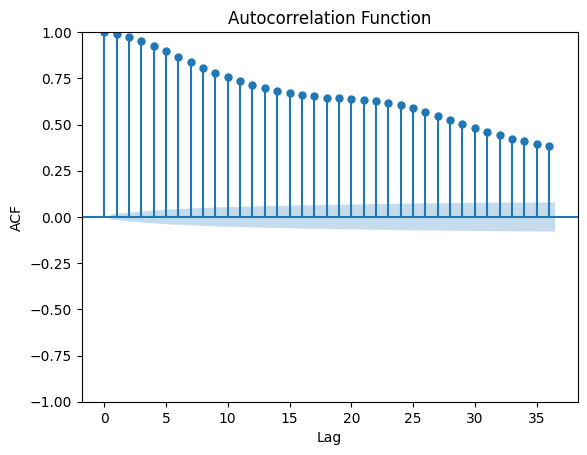

In [ ]:
# Plot the ACF:
plot_acf(data_train_wind, lags=36)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

Slow decay of the autocorrelation coefficients plus the the Dicky-Fuller test, we suspect that the difference should be taken to seek stationarity.

In [ ]:
# If we assume is not stationary, compute the difference (d=1):
diff_train_wind = data_train_wind.diff().dropna()

In [ ]:
# Perform the Aumented Dicky-Fuller test to confirm the stationarity
dicky_fuller_result_5 = adfuller(diff_train_wind)
print('p-value: %f' % dicky_fuller_result_5[1])

p-value: 0.000000


In [ ]:
# Perform the KPSS test to confirm the stationary
kpss_result_5 = kpss(diff_train_wind)
print('p-value: %f' % kpss_result_5[1]) # Now it is stationary

p-value: 0.100000


<ipython-input-50-bc1577f89d38>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_5 = kpss(diff_train_wind)


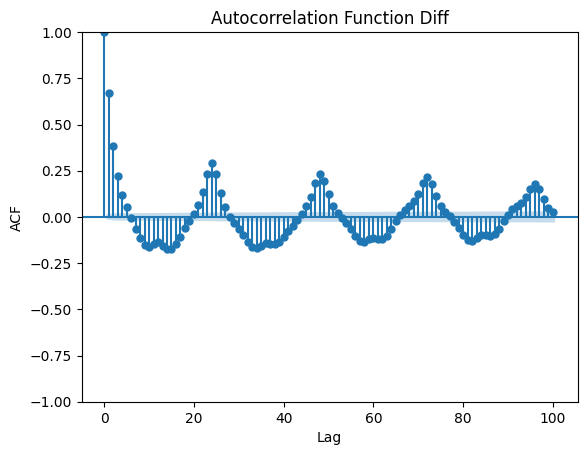

In [ ]:
# Plot the ACF:
plot_acf(diff_train_wind, lags=100)
plt.title('Autocorrelation Function Diff')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

In [ ]:
# Seasonal adjustment (D=1):

# Remove daily seasonality, obtaining the value of each observation - last day observation
diff2_train_wind = diff_train_wind.diff(periods=24)

# However, there will be some observations (first ones) for which there is not previous day observations
diff2_train_wind = diff2_train_wind.dropna()

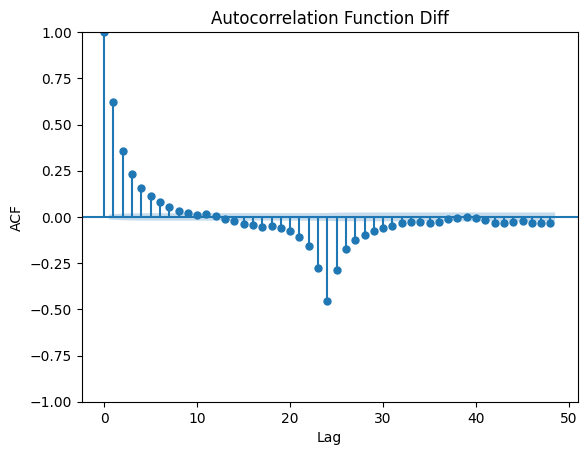

In [ ]:
# Plot the ACF:
plot_acf(diff2_train_wind, lags=48)
plt.title('Autocorrelation Function Diff')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

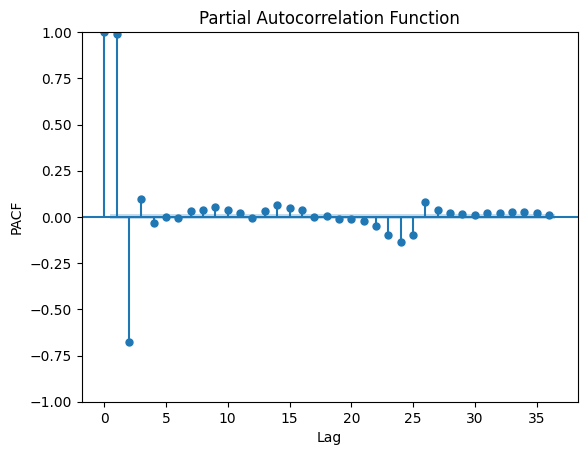

In [ ]:
# Plot the PACF:
plot_pacf(data_train_wind, lags=36, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

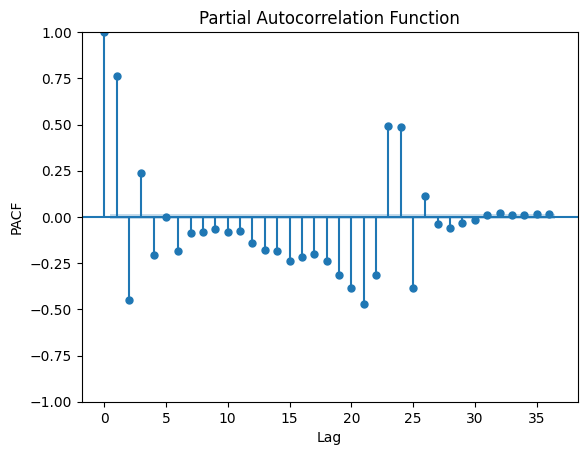

In [ ]:
# Plot the PACF:
plot_pacf(diff_train_solar, lags=36, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

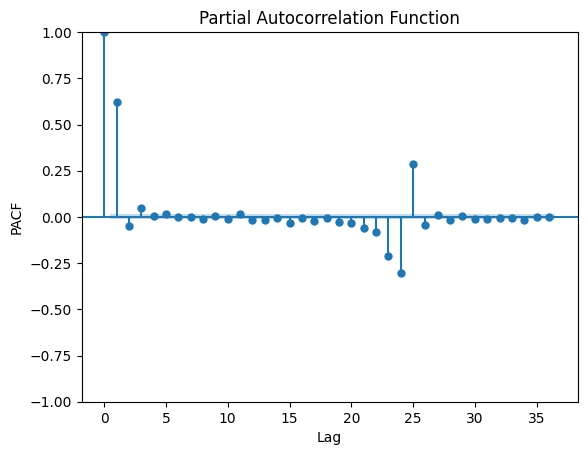

In [ ]:
# Plot the PACF:
plot_pacf(diff2_train_wind, lags=36, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

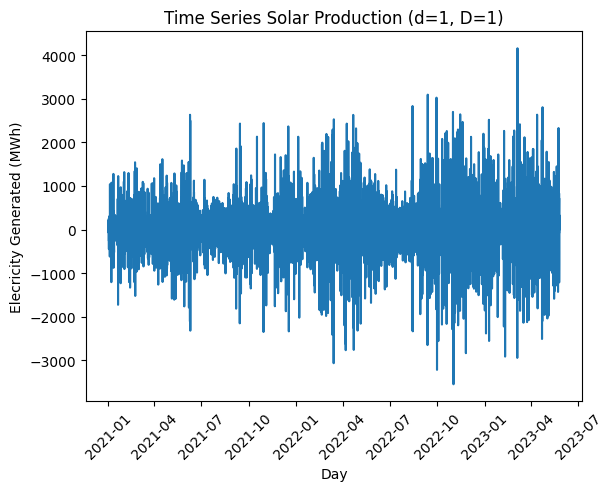

In [ ]:
# Display a plot of solar energy
plt.plot(diff2_train_solar)
plt.xlabel("Day")
plt.ylabel("Elecricity Generated (MWh)")
plt.title("Time Series Solar Production (d=1, D=1)")
plt.xticks(rotation=45)
plt.show()

### Hydro:

#### Split the dataset

In [ ]:
# How many observations goes to test?
split_index = 5250
hydro = combined.iloc[:,3]

# Split train and test
data_train_hydro = hydro[0:-split_index]
data_test_hydro = hydro[-split_index:]

#### Estimate ARIMA using ACF and PACF:

In [ ]:
# Perform the Aumented Dicky-Fuller test to confirm the stationarity
dicky_fuller_result_3 = adfuller(data_train_hydro)
print('p-value: %f' % dicky_fuller_result_3[1])

p-value: 0.000000


In [ ]:
# Perform the KPSS test to confirm the stationary
kpss_result_3 = kpss(data_train_hydro)
print('p-value: %f' % kpss_result_3[1])

p-value: 0.010000


<ipython-input-71-b8b9cc60cd5f>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result_3 = kpss(data_train_hydro)
